This file is created as a trial of sparsity on a regression example. <br>
We consider a dataset with p features and n sample. Dataset is generated over a normal distribution with $\mu=0$ and $\sigma^2=1$ or <br>
$X=\mathcal{N}(\mu, \sigma^2)$.<br>
The output is also generated based on a linear function including a noise term as follows <br>
$y=X\beta+n(0,1)$. 

In [118]:
import numpy as np
import matplotlib.pyplot as plt

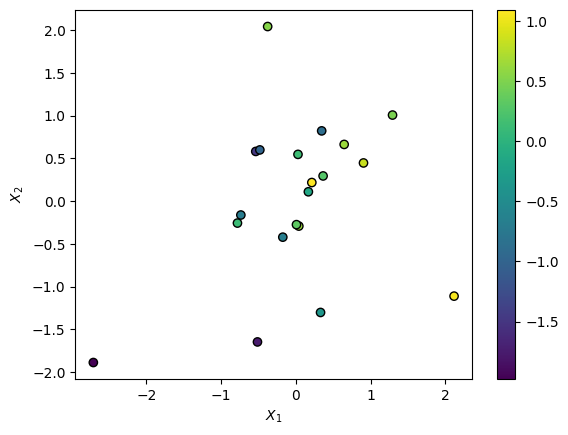

In [269]:
RNG = np.random.default_rng(seed=1)
p = 2
n = 20
var = 1
cov = var*np.eye(p)
mean = np.zeros(p)
sigma = 1

# To define the weights as beta
beta = np.array([1, 0]) 

# To define the features/inputs and labels/outputs
x = RNG.multivariate_normal(mean, cov, size=n)
y = x@beta + RNG.normal(0, sigma**2, size=n)

# To show the dataset
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='black')
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.colorbar()
plt.show()

The loss function also is defined as a squared norm of residuals as follows <br>
$loss=\vert\vert X\beta - Y\vert\vert ^2$

In [279]:
# To define the loss function
# def squared_error(beta):
#     return np.linalg.norm(x.dot(np.atleast_2d(beta).T) - y.reshape(-1, 1), axis=0)**2

# To define another form of loss function
def squared_error(beta):
    beta = np.reshape(beta,(-1, 2))
    return np.sum(abs(beta@x.T-y)**2,axis=1)

In [284]:
# To check the loss function
squared_error(beta)

array([10.26943722])

Then we define a space of 2 dimensions for all probable $\beta$  and calculate the loss function for this space. <br>
After that the residuals (errors) corresponding to the all beta estimation space and real output would be calculated.

In [285]:
# To define the estimation space of beta
_beta1 = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))[0]
_beta2 = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))[1]
_beta = np.dstack((_beta1, _beta2))
_beta = np.reshape(_beta, (-1,2))
# _beta.shape

(10000, 2)

In [287]:
# To calculate the residuals between real output "y" and estimation space "x*_beta"
error_space = squared_error(_beta)
# error_space

array([266.8733238 , 262.37703272, 257.93721797, ..., 114.64624143,
       117.1792949 , 119.76882472])

Now here we find the best estimated weights by least square optimization method.

In [288]:
# To define beta_hat by least square mathod
beta_hat = np.linalg.solve(x.T.dot(x), x.T.dot(y))
# least square in another calculation
# beta_hat = (np.linalg.inv(x.T@x)@x.T)@y
beta_hat

array([0.62441303, 0.20780253])

Here we add a regularization term to the loss function to sparse the solution space.

In [316]:
from numpy.linalg import norm

alpha=1.0
# def regularised_error(beta):
#     return squared_error(beta) + alpha*norm(np.atleast_2d(beta), 1, axis=1)

# To define the regularized loss function
def regularised_error(beta):
    return squared_error(beta) + alpha*np.sum(abs(np.reshape(beta,(-1,2))),axis=1)

# squared_error(beta)
# regularised_error(beta)

# squared_error(_beta)
# regularised_error(_beta)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22352\3051324085.py:8: UserWarning: The following kwargs were not used by contour: 'color'
  axs[1].contour(_beta[:, 0].reshape(100, 100), _beta[:, 1].reshape(100, 100), error_space.reshape(100, 100), levels=200, color='black')


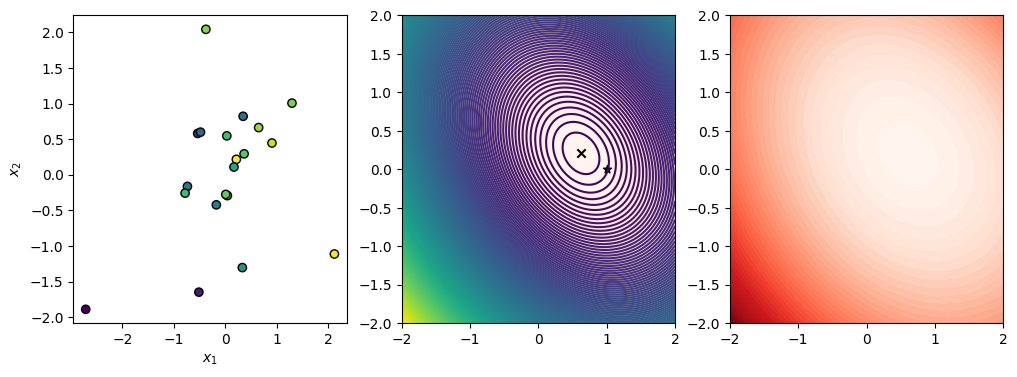

In [323]:
from matplotlib import pyplot as plt

_, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].scatter(x[:, 0], x[:, 1], c=y, edgecolors='black')
axs[0].set_xlabel('$x_1$')
axs[0].set_ylabel('$x_2$')
axs[1].contourf(_beta[:, 0].reshape(100, 100), _beta[:, 1].reshape(100, 100), error_space.reshape(100, 100), levels=50, cmap='Reds')
axs[1].contour(_beta[:, 0].reshape(100, 100), _beta[:, 1].reshape(100, 100), error_space.reshape(100, 100), levels=200, color='black')
axs[1].scatter(beta[0], beta[1], marker='*', color='black')
axs[1].scatter(beta_hat[0], beta_hat[1], marker='x', color='black')

axs[2].contourf(_beta[:, 0].reshape(100, 100), _beta[:, 1].reshape(100, 100), regularised_error(_beta).reshape(100, 100), levels=50, cmap='Reds')

plt.show()